In [2]:
import pandas as pd
import matplotlib as mpl
import pylab as plt
import numpy as np
from fancyimpute import KNN  
import seaborn as sns

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

from sklearn import metrics
from ggplot import *

In [3]:
#Importing data set
train_data = pd.read_csv("Train_data.csv")
test_data = pd.read_csv("Test_data.csv")

In [4]:
#Complete data
complete_data = pd.concat([train_data.iloc[:,:], test_data.iloc[:,:]])
complete_data = complete_data.reset_index(drop = True)

In [5]:
complete_data.dtypes

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

In [6]:
#Getting the percentage of train and test data
nrow_train = train_data.shape[0]
nrow_test = test_data.shape[0]
sum = nrow_train + nrow_test
print("           :     Train:     Test")
print("Observations:    ",   nrow_train, ":   ",       nrow_test)
print("Percentage:      ",   round((nrow_train*100)/sum)   ,"  :   "   ,       round((nrow_test*100)/sum))

           :     Train:     Test
Observations:     3333 :    1667
Percentage:       67   :    33


In [7]:
#Class Imbalance in Complete data
#Positve cases are the churn out customer, negative who didn't churn out
no_positive_cases = complete_data.loc[complete_data.Churn == ' True.'].shape[0]
no_negative_cases = complete_data.loc[complete_data.Churn == ' False.'].shape[0]
print("             :Churned         :Not Churned")
print("Total:       ", no_positive_cases,":           ",no_negative_cases)
print("Percentage:  ", no_positive_cases*100/sum, ":         ", no_negative_cases*100/sum)


             :Churned         :Not Churned
Total:        707 :            4293
Percentage:   14.14 :          85.86


# Completeness of Data

In [8]:
#Creating a dataframe of missing values
Missing_value = pd.DataFrame(complete_data.isnull().sum())
Missing_value = Missing_value.reset_index()
Missing_value = Missing_value.rename(columns = { 'index' : 'Features', 0 : 'Count'})
Missing_value

,Features,Count
0,state,0
1,account length,0
2,area code,0
3,phone number,0
4,international plan,0
5,voice mail plan,0
6,number vmail messages,0
7,total day minutes,0
8,total day calls,0
9,total day charge,0


There are no missing value in the data

# Anomaly Detection

In [9]:
df = complete_data.copy()
#Putting all the numeric variables in the list
numeric_var = ['account length', 'number vmail messages','total day minutes', 'total day calls', 'total day charge', 'total eve minutes',
               'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge',
               'total intl minutes', 'total intl calls', 'total intl charge']


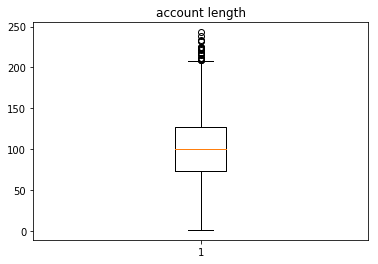

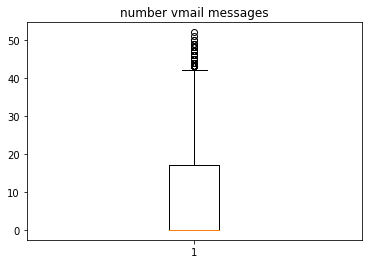

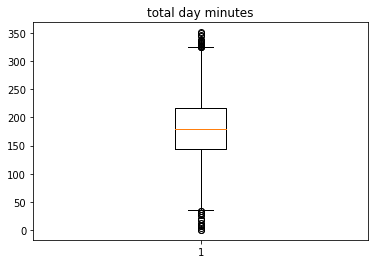

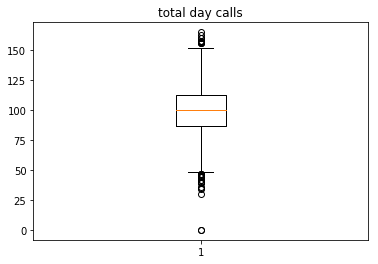

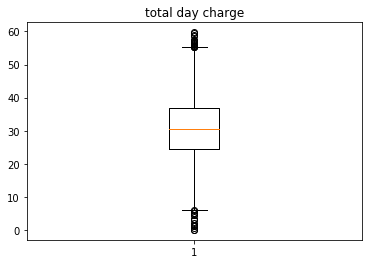

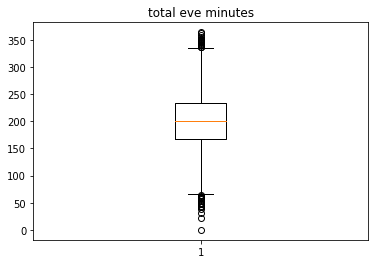

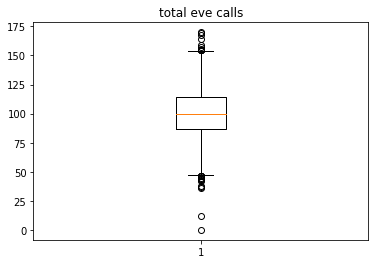

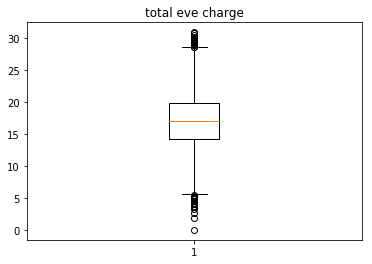

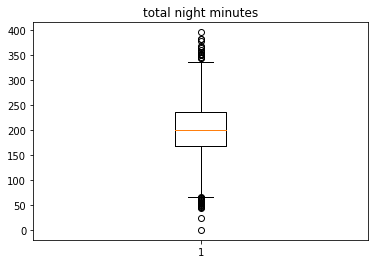

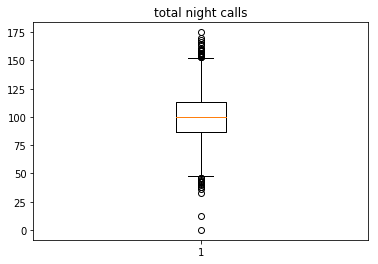

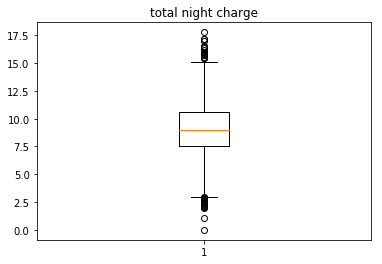

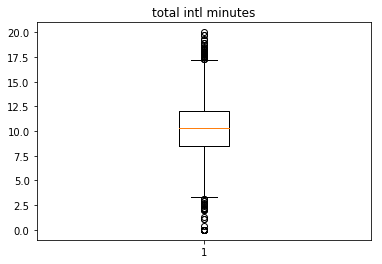

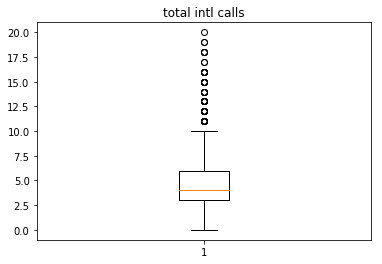

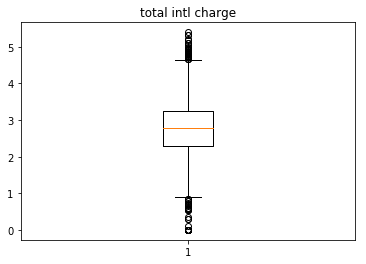

In [10]:
#%matplotlib inline
for i in numeric_var :
    plt.figure()
    plt.clf()
    plt.boxplot(complete_data[i])
    plt.title(i)
    plt.savefig(i)
    plt.show()

In [11]:
for i in numeric_var:
    q75, q25 = np.percentile(complete_data.loc[:,i], [75, 25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(min), print(max)
    complete_data.loc[complete_data[i] < minimum,i] = np.nan
    complete_data.loc[complete_data[i] > maximum, i] = np.nan

<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>


In [12]:
Missing_val_Outliers = pd.DataFrame(complete_data.isnull().sum())
Missing_val_Outliers

,0
state,0
account length,24
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,60
total day minutes,34
total day calls,35
total day charge,34


In [13]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, complete_data.shape[1]):
    #print(i)
    if(complete_data.iloc[:,i].dtypes == 'object'):
        complete_data.iloc[:,i] = pd.Categorical(complete_data.iloc[:,i])
        complete_data.iloc[:,i] = complete_data.iloc[:,i].cat.codes 
        complete_data.iloc[:,i] = complete_data.iloc[:,i].astype('object')
        
        lis.append(complete_data.columns[i])

In [14]:
#Imputing
complete_data = pd.DataFrame(KNN(k = 3).complete(complete_data), columns = complete_data.columns)

Imputing row 1/5000 with 0 missing, elapsed time: 10.839
Imputing row 101/5000 with 0 missing, elapsed time: 10.839
Imputing row 201/5000 with 0 missing, elapsed time: 10.839
Imputing row 301/5000 with 0 missing, elapsed time: 10.839
Imputing row 401/5000 with 0 missing, elapsed time: 10.839
Imputing row 501/5000 with 0 missing, elapsed time: 10.839
Imputing row 601/5000 with 0 missing, elapsed time: 10.855
Imputing row 701/5000 with 0 missing, elapsed time: 10.857
Imputing row 801/5000 with 0 missing, elapsed time: 10.859
Imputing row 901/5000 with 0 missing, elapsed time: 10.861
Imputing row 1001/5000 with 0 missing, elapsed time: 10.862
Imputing row 1101/5000 with 0 missing, elapsed time: 10.863
Imputing row 1201/5000 with 1 missing, elapsed time: 10.869
Imputing row 1301/5000 with 0 missing, elapsed time: 10.870
Imputing row 1401/5000 with 2 missing, elapsed time: 10.870
Imputing row 1501/5000 with 0 missing, elapsed time: 10.875
Imputing row 1601/5000 with 0 missing, elapsed time:

In [15]:
#Confirming that there ar no NAs left in the data set
complete_data.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

# Feature Engineering

In [16]:
#Total Minutes
complete_data['total_minutes'] = complete_data['total day minutes'] + complete_data['total eve minutes'] + complete_data['total night minutes'] + complete_data['total intl minutes']
complete_data['total_calls'] = complete_data['total day calls'] + complete_data['total eve calls'] + complete_data['total night calls'] + complete_data['total intl calls']
complete_data['total_charge'] = complete_data['total day charge'] + complete_data['total eve charge'] + complete_data['total night charge'] + complete_data['total intl charge']
complete_data['total_avgmins/call'] = complete_data['total_minutes']/ complete_data['total_charge']

In [17]:
complete_data['total_minutes'] = np.round(complete_data['total_minutes'] )
complete_data['total_charge'] = np.round(complete_data['total_charge'])

In [18]:
#Categorizing the customers based on the minutes, calls and charge
complete_data['minutes_category'] = np.where((complete_data['total_minutes'] > 200) & (complete_data['total_minutes'] <=400), 'Low', np.where((complete_data['total_minutes'] > 400) & (complete_data['total_minutes'] <=600) ,'Average',
    np.where((complete_data['total_minutes'] > 600) & (complete_data['total_minutes'] <=800), 'High', 'VHigh')))

complete_data['calls_category'] = np.where((complete_data['total_calls'] > 150) & (complete_data['total_calls'] <=225), 'Low', np.where((complete_data['total_calls'] > 225) & (complete_data['total_calls'] <=300) ,'Average',
    np.where((complete_data['total_calls'] > 300) & (complete_data['total_calls'] <=375), 'High', 'VHigh')))

complete_data['charge_category'] = np.where((complete_data['total_charge'] > 20) & (complete_data['total_charge'] <=40), 'Low', np.where((complete_data['total_charge'] > 40) & (complete_data['total_charge'] <=60) ,'Average',
    np.where((complete_data['total_charge'] > 60) & (complete_data['total_charge'] <=80), 'High', 'VHigh')))

In [19]:
lis = []
for i in range(0, complete_data.shape[1]):
    #print(i)
    if(complete_data.iloc[:,i].dtypes == 'object'):
        complete_data.iloc[:,i] = pd.Categorical(complete_data.iloc[:,i])
        complete_data.iloc[:,i] = complete_data.iloc[:,i].cat.codes 
        complete_data.iloc[:,i] = complete_data.iloc[:,i].astype('object')
        
        lis.append(complete_data.columns[i])

In [20]:
complete_data.head() , complete_data.dtypes

(   state  account length  area code  phone number  international plan  \
 0   16.0           128.0      415.0        2845.0                 0.0   
 1   35.0           107.0      415.0        2301.0                 0.0   
 2   31.0           137.0      415.0        1616.0                 0.0   
 3   35.0            84.0      408.0        2510.0                 1.0   
 4   36.0            75.0      415.0         155.0                 1.0   
 
    voice mail plan  number vmail messages  total day minutes  total day calls  \
 0              1.0                   25.0              265.1            110.0   
 1              1.0                   26.0              161.6            123.0   
 2              0.0                    0.0              243.4            114.0   
 3              0.0                    0.0              299.4             71.0   
 4              0.0                    0.0              166.7            113.0   
 
    total day charge       ...         total intl charge  \


# Variable Importance

In [21]:
factor_var = ["state", "area code", "international plan", "voice mail plan", "number customer service calls",
             'minutes_category', 'calls_category', 'charge_category']
for i in factor_var:
    complete_data.loc[:,i] = complete_data.loc[:,i].astype('object')

In [22]:
#loop for chi square values
for i in factor_var:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(complete_data['Churn'], complete_data[i]))
    print(p)

state
7.85083622437e-05
area code
0.754658138533
international plan
1.9443947475e-74
voice mail plan
7.16450178099e-15
number customer service calls
4.18629199349e-101
minutes_category
1.50230699897e-24
calls_category
0.32758856218
charge_category
6.15314663405e-64


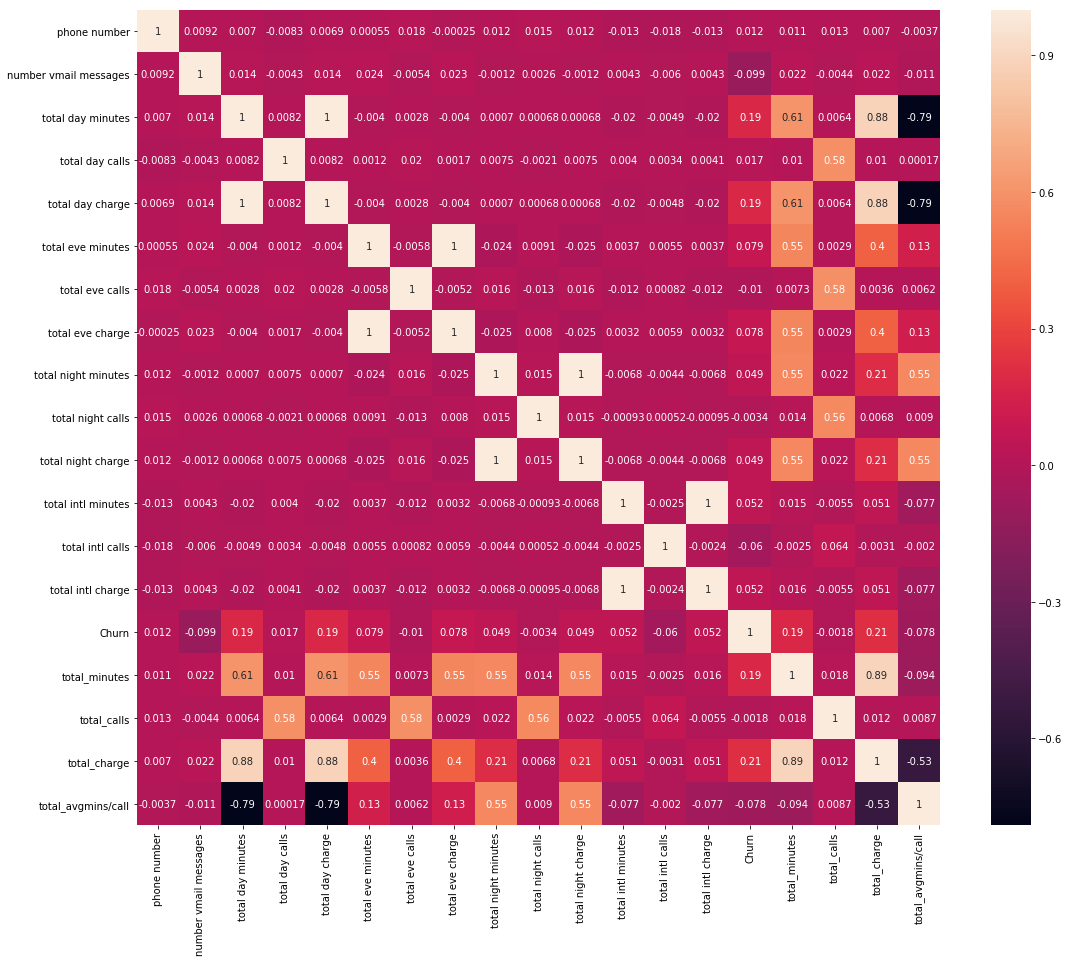

In [23]:
#Feature Selection

#Finding the correlation between continuous variable

#Finding the correlation between the variables
churn_corr = complete_data.iloc[:,2:-1]

#Setting the plot height and width
f, ax = plt.subplots(figsize=(18, 15))

#Generating correlation matrix
corr = churn_corr.corr()

#Ploting using seaborn library
#annot shows the correlation number inside each block
correlation_plot = sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True)
plt.show()
plt.savefig("correlation_plot.png")

In [24]:
for i in factor_var:
    complete_data.loc[:,i] = complete_data.loc[:,i].astype('float64')

In [25]:
#Deleting all the correlated variables from the data set
corr_variables = ['area code', 'calls_category', 'total day minutes', 'total eve minutes',
                                                  'total night minutes', 'total intl minutes', 'total_minutes', 'total day calls', 'total eve calls',
                                                  'total night calls', 'total intl calls', 'total day charge', 'total eve charge',
                                                  'total night charge', 'total intl charge', 'total_avgmins/call']
complete_data = complete_data.drop(corr_variables, axis= 1)

In [26]:
complete_data.head()

,state,account length,phone number,international plan,voice mail plan,number vmail messages,number customer service calls,Churn,total_calls,total_charge,minutes_category,charge_category
0,16.0,128.0,2845.0,0.0,1.0,25.0,1.0,0.0,303.0,76.0,1.0,1.0
1,35.0,107.0,2301.0,0.0,1.0,26.0,1.0,0.0,332.0,59.0,1.0,0.0
2,31.0,137.0,1616.0,0.0,0.0,0.0,0.0,0.0,333.0,62.0,0.0,1.0
3,35.0,84.0,2510.0,1.0,0.0,0.0,2.0,0.0,255.0,72.0,1.0,1.0
4,36.0,75.0,155.0,1.0,0.0,0.0,3.0,0.0,359.0,52.0,0.0,0.0


In [27]:
#Keeping the churn variable at last after feature engineering variables
cols = complete_data.columns.tolist()
complete_data = complete_data[['state',
 'account length',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'number customer service calls',
 'total_calls',
 'total_charge',
 'minutes_category',
 'charge_category',
 'Churn']]

# Feature Scaling - Standardization

In [28]:
fs_var = ["account length", "number vmail messages", "total_calls", "total_charge"]

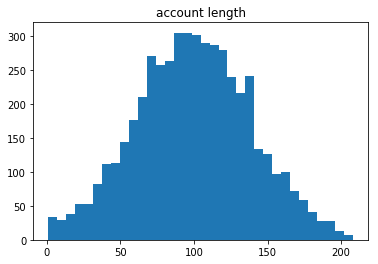

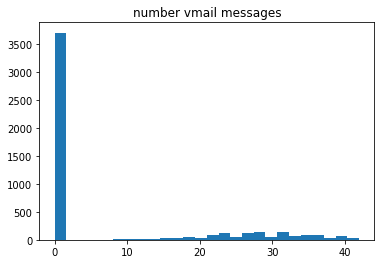

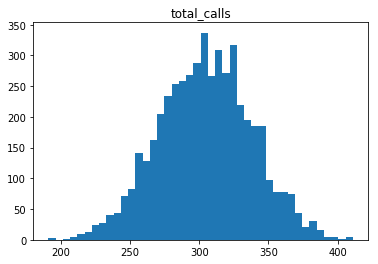

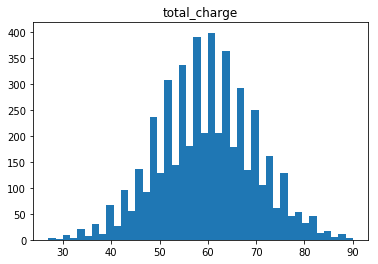

In [29]:
#Normality check
for i in fs_var:
    plt.figure()
    plt.clf()
    plt.hist(complete_data[i], bins = 'auto')
    plt.title(i)
    plt.savefig(i)
    plt.show()

In [30]:
#Applying standarization as few variables are normalized
for i in fs_var:
    print(i)
    complete_data[i] = (complete_data[i] - complete_data[i].mean())/complete_data[i].std()

account length
number vmail messages
total_calls
total_charge


In [31]:
complete_data.head()

,state,account length,phone number,international plan,voice mail plan,number vmail messages,number customer service calls,total_calls,total_charge,minutes_category,charge_category,Churn
0,16.0,0.728582,2845.0,0.0,1.0,1.368773,1.0,-0.044916,1.643973,1.0,1.0,0.0
1,35.0,0.187611,2301.0,0.0,1.0,1.446138,1.0,0.822736,-0.050639,1.0,0.0,0.0
2,31.0,0.960427,1616.0,0.0,0.0,-0.565369,0.0,0.852655,0.248410,0.0,1.0,0.0
3,35.0,-0.404881,2510.0,1.0,0.0,-0.565369,2.0,-1.481031,1.245241,1.0,1.0,0.0
4,36.0,-0.636726,155.0,1.0,0.0,-0.565369,3.0,1.630550,-0.748421,0.0,0.0,0.0


Segregating Train and Test Data

In [32]:
train_new = complete_data.iloc[0:len(train_data),]
test_new = complete_data.iloc[len(train_data):,]

# Class Imbalance: SMOTE

# Synthetic Minority Oversampling technique

In [33]:
X = train_new.drop("Churn", 1)

In [34]:
Y = train_new["Churn"]

In [35]:
X.shape, Y.shape

((3333, 11), (3333,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [37]:
X_train.shape, y_train.shape

((2666, 11), (2666,))

In [38]:
oversampler = SMOTE(random_state=0)

In [39]:
X_train ,y_train = oversampler.fit_sample(X_train, y_train)

In [40]:
X_train.shape, y_train.shape

((4562, 11), (4562,))

In [41]:
X_train = pd.DataFrame(X_train, columns = ['state', 'account length', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages',
       'number customer service calls', 'total_calls', 'total_charge',
       'minutes_category', 'charge_category'] )

In [42]:
X_train.head()

,state,account length,phone number,international plan,voice mail plan,number vmail messages,number customer service calls,total_calls,total_charge,minutes_category,charge_category
0,10.0,0.187611,2997.0,0.0,0.0,-0.565369,2.0,0.912493,0.049044,0.0,0.0
1,37.0,0.419456,204.0,1.0,0.0,-0.565369,3.0,-0.224431,1.045875,1.0,1.0
2,29.0,0.445216,1411.0,0.0,0.0,-0.565369,1.0,0.523545,-0.848104,1.0,0.0
3,37.0,-0.507923,3356.0,0.0,0.0,-0.565369,1.0,-0.134674,-0.250005,0.0,0.0
4,3.0,-0.198797,4716.0,1.0,1.0,-0.565369,0.0,-1.032245,1.145558,0.0,1.0


In [43]:
y_train = pd.DataFrame(y_train, columns = ["Churn"])

In [44]:
y_train.head()

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [45]:
oversampled_train = pd.concat([X_train, y_train], axis = 1)

In [46]:
oversampled_train.shape

(4562, 12)

In [47]:
no_positive_cases = oversampled_train.loc[oversampled_train.Churn == 1].shape[0]
no_negative_cases = oversampled_train.loc[oversampled_train.Churn == 0].shape[0]
print("             :Churned         :Not Churned")
print("Total:       ", no_positive_cases,":           ",no_negative_cases)
print("Percentage:  ", no_positive_cases*100/sum, ":         ", no_negative_cases*100/sum)


             :Churned         :Not Churned
Total:        2281 :            2281
Percentage:   45.62 :          45.62


## MODEL GENERATION
# Logistic Classifier

In [48]:
#select column indexes for independent variables
train_cols = oversampled_train.columns[0:11]

In [49]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(oversampled_train['Churn'], oversampled_train[train_cols]).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.515533
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4562
Model:                          Logit   Df Residuals:                     4551
Method:                           MLE   Df Model:                           10
Date:                Tue, 29 May 2018   Pseudo R-squ.:                  0.2562
Time:                        23:24:59   Log-Likelihood:                -2351.9
converged:                       True   LL-Null:                       -3162.1
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
state                            -0.0129      0.002     -5.546      0.000      -0.017      -0.008
account length                    0.0540      0.038      1.424      0.155      -0.020       0.128
phone number                     -0.0001   2.35e-05     -5.780      0.000      -0.000   -8.96e-05
international plan                2.6963      0.126     21.466      0.000       2.450       2.942
voice mail plan                  -3.0240      0.291    -10.384      0.000      -3.595      -2.453
number vmail messages             0.8710      0.124      6.997      0.000       0.627       1.115
number customer service calls     0.5506      0.026     20.925      0.000       0.499       0.602
total_calls                       0.0977      0.038      2.581      0.010       0.024       0.172
total_charge                      0.8143      0.052     15.792      0.000       0.713       0.915
minutes_category                 -0.6766      0.095     -7.095      0.000      -0.864      -0.490
charge_category                   0.3478      0.076      4.579      0.000       0.199       0.497
=================================================================================================
"""

In [50]:
for i in range(0, test_new.shape[1]):
    if(test_new.iloc[:,i].dtypes != 'float64'):
        test_new.iloc[:,i] = test_new.iloc[:,i].astype('float32')

In [51]:
#Predict test data
test_new['Actual_prob'] = logit.predict(test_new[train_cols])

test_new['ActualVal'] = 1
test_new.loc[test_new.Actual_prob < 0.5, 'ActualVal'] = 0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

In [52]:
#Build confusion matrix
CM = pd.crosstab(test_new['Churn'], test_new['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

(FN*100)/(FN+TP)

22.767857142857142

In [53]:
CM

ActualVal,0,1
Churn,,
0.0,1056,387
1.0,51,173


# Model Performance

ROCR

In [54]:
fpr, tpr, _ = metrics.roc_curve(test_new.Churn, test_new['ActualVal'])

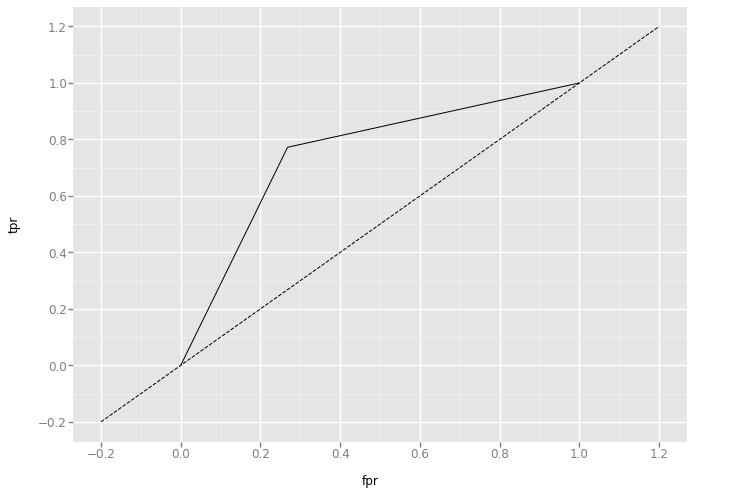

<ggplot: (-9223371933818200551)>

In [55]:
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
 geom_line() +\
 geom_abline(linetype='dashed')

In [56]:
auc = metrics.auc(fpr,tpr)

In [57]:
auc

0.75206508019008034